### Jupyter notebook about oil stocks performance in Brazilian market!

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [6]:
ativos = ['PETR4','PRIO3', 'RRRP3', 'RECV3', 'ENAT3', 'BRKM5']

In [7]:
ativos = [i + '.SA' for i in ativos]

In [8]:
inicio = '2022-02-01'
fim = '2023-08-17'
yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yes_str = yesterday.strftime('%Y-%m-%d')
#yesterday =  datetime.date.today() - datetime.timedelta(days=1)
yes_str

'2023-08-21'

In [9]:
yes_str

'2023-08-21'

In [10]:
df = yf.download(ativos, start = inicio, end = yes_str)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [11]:
df.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-02-01,23.799999,14.092640,20.687471,41.099998,29.891048,44.070000
2023-02-02,22.450001,13.741786,19.729942,40.049999,28.337885,43.439999
2023-02-03,22.020000,13.449408,19.947199,40.169998,27.849470,42.490002
2023-02-06,21.990000,13.644326,20.743801,41.200001,28.406263,43.650002
2023-02-07,22.129999,14.112132,20.615055,41.630001,28.865374,43.689999


#### normalizando os ativos


In [12]:
normalizado = df/df.iloc[0]

<Axes: xlabel='Date'>

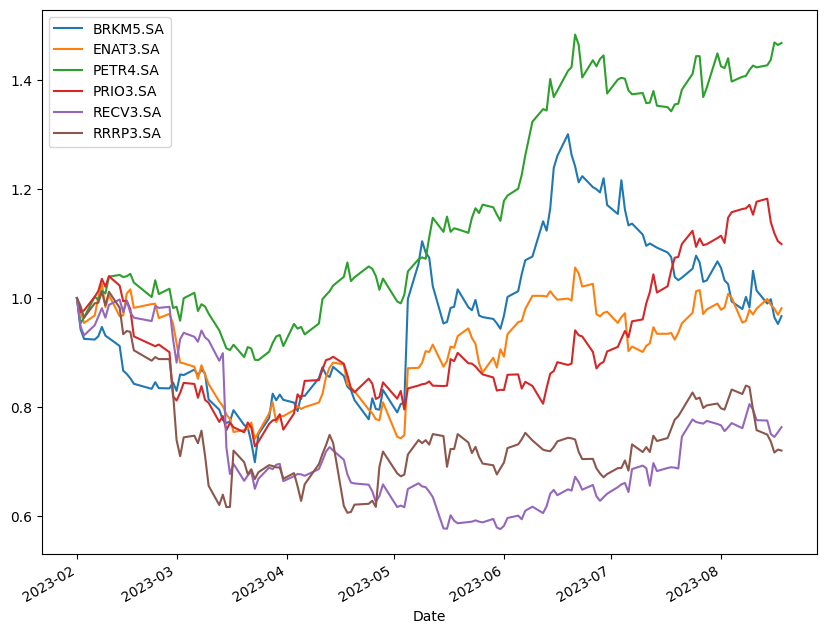

In [13]:
normalizado.plot(figsize = (10,8))

### Preços no dia do aporte

In [14]:
primeiro = df.iloc[0]

In [15]:
primeiro

BRKM5.SA    23.799999
ENAT3.SA    14.092640
PETR4.SA    20.687471
PRIO3.SA    41.099998
RECV3.SA    29.891048
RRRP3.SA    44.070000
Name: 2023-02-01 00:00:00, dtype: float64

In [16]:
#qntd=[100,100,100,500,300,1000,4000]
#res_list = []
#for i in range(0, len(primeiro)):
#    res_list.append(primeiro[i] * qntd[i])
    

In [17]:
comprados = 10000/primeiro

In [18]:
comprados

BRKM5.SA    420.168081
ENAT3.SA    709.590258
PETR4.SA    483.384354
PRIO3.SA    243.309011
RECV3.SA    334.548319
RRRP3.SA    226.911733
Name: 2023-02-01 00:00:00, dtype: float64

In [19]:
## Número de papéis arredondados
round(comprados, 0)

BRKM5.SA    420.0
ENAT3.SA    710.0
PETR4.SA    483.0
PRIO3.SA    243.0
RECV3.SA    335.0
RRRP3.SA    227.0
Name: 2023-02-01 00:00:00, dtype: float64

In [20]:
comprados = round(comprados, 0)

In [21]:
comprados

BRKM5.SA    420.0
ENAT3.SA    710.0
PETR4.SA    483.0
PRIO3.SA    243.0
RECV3.SA    335.0
RRRP3.SA    227.0
Name: 2023-02-01 00:00:00, dtype: float64

## 7.4. Construção da carteira e da comparação com o IBOV

Como saber qual era o valor que tínhamos em cada papel, por dia? Basta multiplicar o número de papéis que compramos com os preços diários

In [22]:
PL = df*comprados
#PL=df*qntd

In [23]:
PL.head()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-02-01,9995.999680,10005.774345,9992.048681,9987.299629,10013.501225,10003.889931
2023-02-02,9429.000320,9756.668062,9529.562141,9732.149815,9493.191442,9860.879688
2023-02-03,9248.400192,9549.079380,9634.497053,9761.309555,9329.572496,9645.230381
2023-02-06,9235.799904,9687.471609,10019.255939,10011.600185,9516.098223,9908.550346
2023-02-07,9294.599648,10019.613771,9957.071606,10116.090260,9669.900160,9917.629688


In [24]:
PL.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA
Date,,,,,,
2023-08-14,9895.199776,9989.699783,14255.711540,11807.370037,7765.300102,7500.080208
2023-08-15,9975.000000,9883.200054,14358.069717,11377.259926,7517.400179,7372.959896
2023-08-16,9643.199615,9812.199783,14674.450710,11173.139889,7463.800230,7170.930035
2023-08-17,9521.400032,9698.599892,14627.923931,11027.340260,7550.900307,7225.409983
2023-08-18,9664.200096,9819.299946,14665.145170,10976.309555,7644.699898,7207.250000


In [25]:
# Criando uma nova coluna que vai demonstrar o valor total da nossa carteira, por dia
PL['PL Total'] = PL.sum(axis = 1)

In [26]:
#PL.head()
PL.tail()

,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,
2023-08-14,9895.199776,9989.699783,14255.711540,11807.370037,7765.300102,7500.080208,61213.361446
2023-08-15,9975.000000,9883.200054,14358.069717,11377.259926,7517.400179,7372.959896,60483.889772
2023-08-16,9643.199615,9812.199783,14674.450710,11173.139889,7463.800230,7170.930035,59937.720263
2023-08-17,9521.400032,9698.599892,14627.923931,11027.340260,7550.900307,7225.409983,59651.574404
2023-08-18,9664.200096,9819.299946,14665.145170,10976.309555,7644.699898,7207.250000,59976.904665


In [27]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [28]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,113430.0,113598.0,110729.0,112303.0,112303.0,17821500
2023-02-02,112072.0,112943.0,109747.0,109935.0,109935.0,15241800
2023-02-03,110141.0,110570.0,108185.0,108490.0,108490.0,13235300
2023-02-06,108518.0,108710.0,107416.0,108456.0,108456.0,11514600
2023-02-07,108727.0,109037.0,107234.0,107920.0,107920.0,12956300


In [29]:
ibov.rename(columns = {'Close':'Ibov'}, inplace = True)

In [30]:
ibov = ibov[['Ibov']]

In [31]:
ibov

,Ibov
Date,
2023-02-01,112303.0
2023-02-02,109935.0
2023-02-03,108490.0
2023-02-06,108456.0
2023-02-07,107920.0
...,...
2023-08-10,118350.0
2023-08-11,118065.0
2023-08-14,116810.0


Agora vamos juntar os dados das tabelas do IBOV e da nossa carteira

In [32]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [33]:
novo_df.head()

,Ibov,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,,
2023-02-01,112303.0,9995.999680,10005.774345,9992.048681,9987.299629,10013.501225,10003.889931,59998.513491
2023-02-02,109935.0,9429.000320,9756.668062,9529.562141,9732.149815,9493.191442,9860.879688,57801.451469
2023-02-03,108490.0,9248.400192,9549.079380,9634.497053,9761.309555,9329.572496,9645.230381,57168.089058
2023-02-06,108456.0,9235.799904,9687.471609,10019.255939,10011.600185,9516.098223,9908.550346,58378.776207
2023-02-07,107920.0,9294.599648,10019.613771,9957.071606,10116.090260,9669.900160,9917.629688,58974.905132


<Axes: xlabel='Date'>

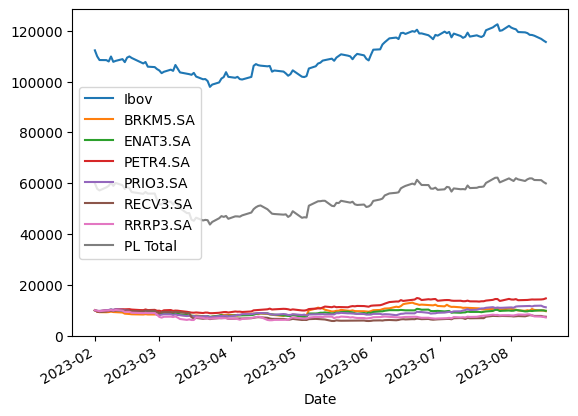

In [34]:
novo_df.plot()

In [35]:
novo_normalizado = (novo_df/novo_df.iloc[0])*100

In [36]:
novo_normalizado

,Ibov,BRKM5.SA,ENAT3.SA,PETR4.SA,PRIO3.SA,RECV3.SA,RRRP3.SA,PL Total
Date,,,,,,,,
2023-02-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2023-02-02,97.891419,94.327737,97.510375,95.371454,97.445257,94.803918,98.570454,96.338139
2023-02-03,96.604721,92.521013,95.435686,96.421638,97.737225,93.169934,96.414799,95.282509
2023-02-06,96.574446,92.394960,96.818810,100.272289,100.243315,95.032676,99.046975,97.300371
2023-02-07,96.097166,92.983193,100.138314,99.649951,101.289544,96.568622,99.137733,98.293944
...,...,...,...,...,...,...,...,...
2023-08-10,105.384540,105.000002,97.000989,142.623988,115.279812,79.555593,79.532561,103.150137
2023-08-11,105.130762,101.386554,98.065372,142.298049,117.664239,77.615213,75.788522,102.120148
2023-08-14,104.013250,98.991598,99.839347,142.670557,118.223849,77.548301,74.971639,102.024797


<Axes: xlabel='Date'>

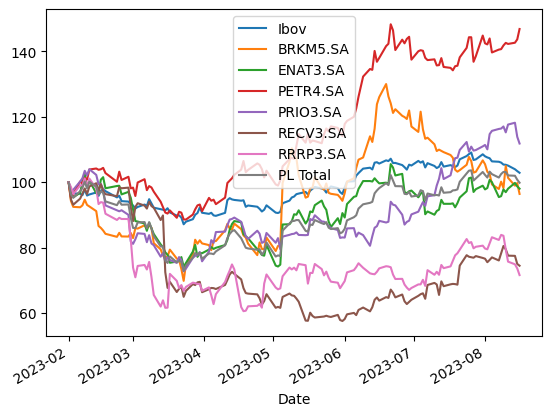

In [37]:
novo_normalizado.plot()

<Axes: >

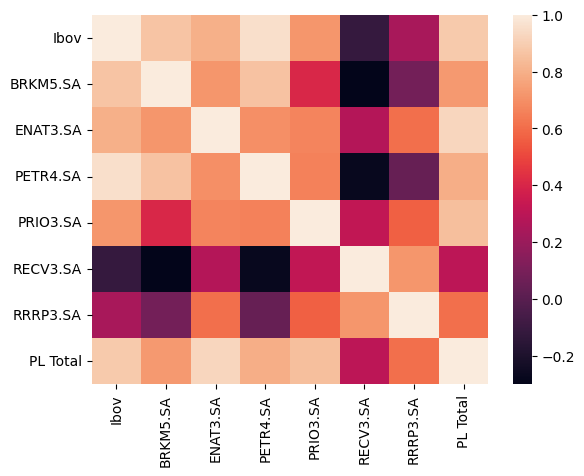

In [38]:
sns.heatmap(novo_normalizado.corr())

<Axes: xlabel='Date'>

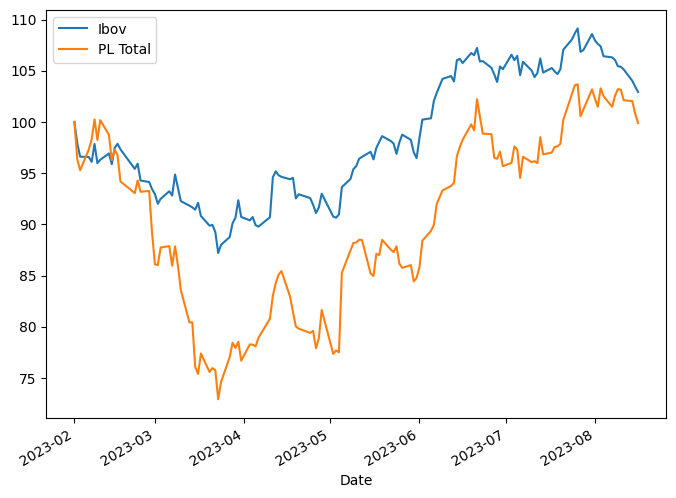

In [39]:
novo_normalizado[['Ibov','PL Total']].plot(figsize = (8,6))

E se o usuário conseguisse determinar quanto ele investiria em cada ativo?

In [40]:
ativos

['PETR4.SA', 'PRIO3.SA', 'RRRP3.SA', 'RECV3.SA', 'ENAT3.SA', 'BRKM5.SA']